In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os

current_working_directory = os.getcwd()
csv_file_path = os.path.join(current_working_directory, 'Dataset/5G Dataset NS.csv')
df_final = pd.read_csv(csv_file_path, na_values=['null'])
print("Dataset Shape:", df_final.shape)
print("Dataset Description:")
df_final.describe()

Dataset Shape: (3000, 10)
Dataset Description:


,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,241.673333,0.004496,29.855333,41.584333,4691.866667,1533.408333,3.883700e+07
std,179.922550,0.004917,13.656399,9.332412,5569.961281,846.788300,2.213678e+07
min,60.000000,0.000001,1.000000,29.000000,300.000000,51.000000,7.500000e+06
25%,100.000000,0.000010,20.000000,36.000000,900.000000,800.750000,1.900000e+07
50%,210.000000,0.000100,28.000000,40.000000,1350.000000,1550.500000,3.700000e+07
75%,300.000000,0.010000,40.000000,50.000000,10125.000000,2250.250000,4.500000e+07
max,600.000000,0.010000,50.000000,60.000000,17500.000000,3000.000000,7.700000e+07


## Data Visualizations

Slice Type
URLLC    1271
mMTC     1070
eMBB      614
Name: count, dtype: int64


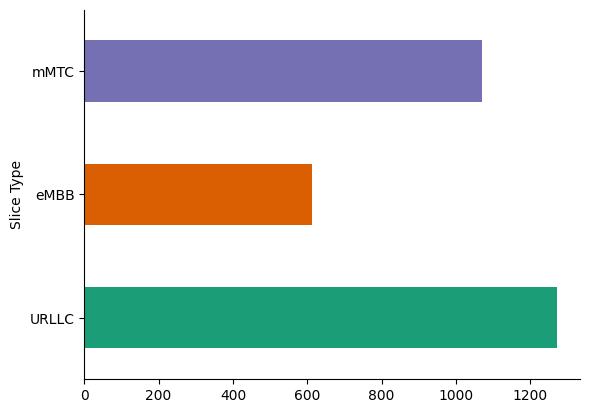

In [6]:
df_final['Slice Type'].value_counts()
# Define the values to be removed
values_to_remove = ['URRLC', 'embb']

# Filter the DataFrame to exclude rows with the specified values in 'Slice Type'
df_final = df_final[~df_final['Slice Type'].isin(values_to_remove)]

print(df_final['Slice Type'].value_counts())

from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('Slice Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

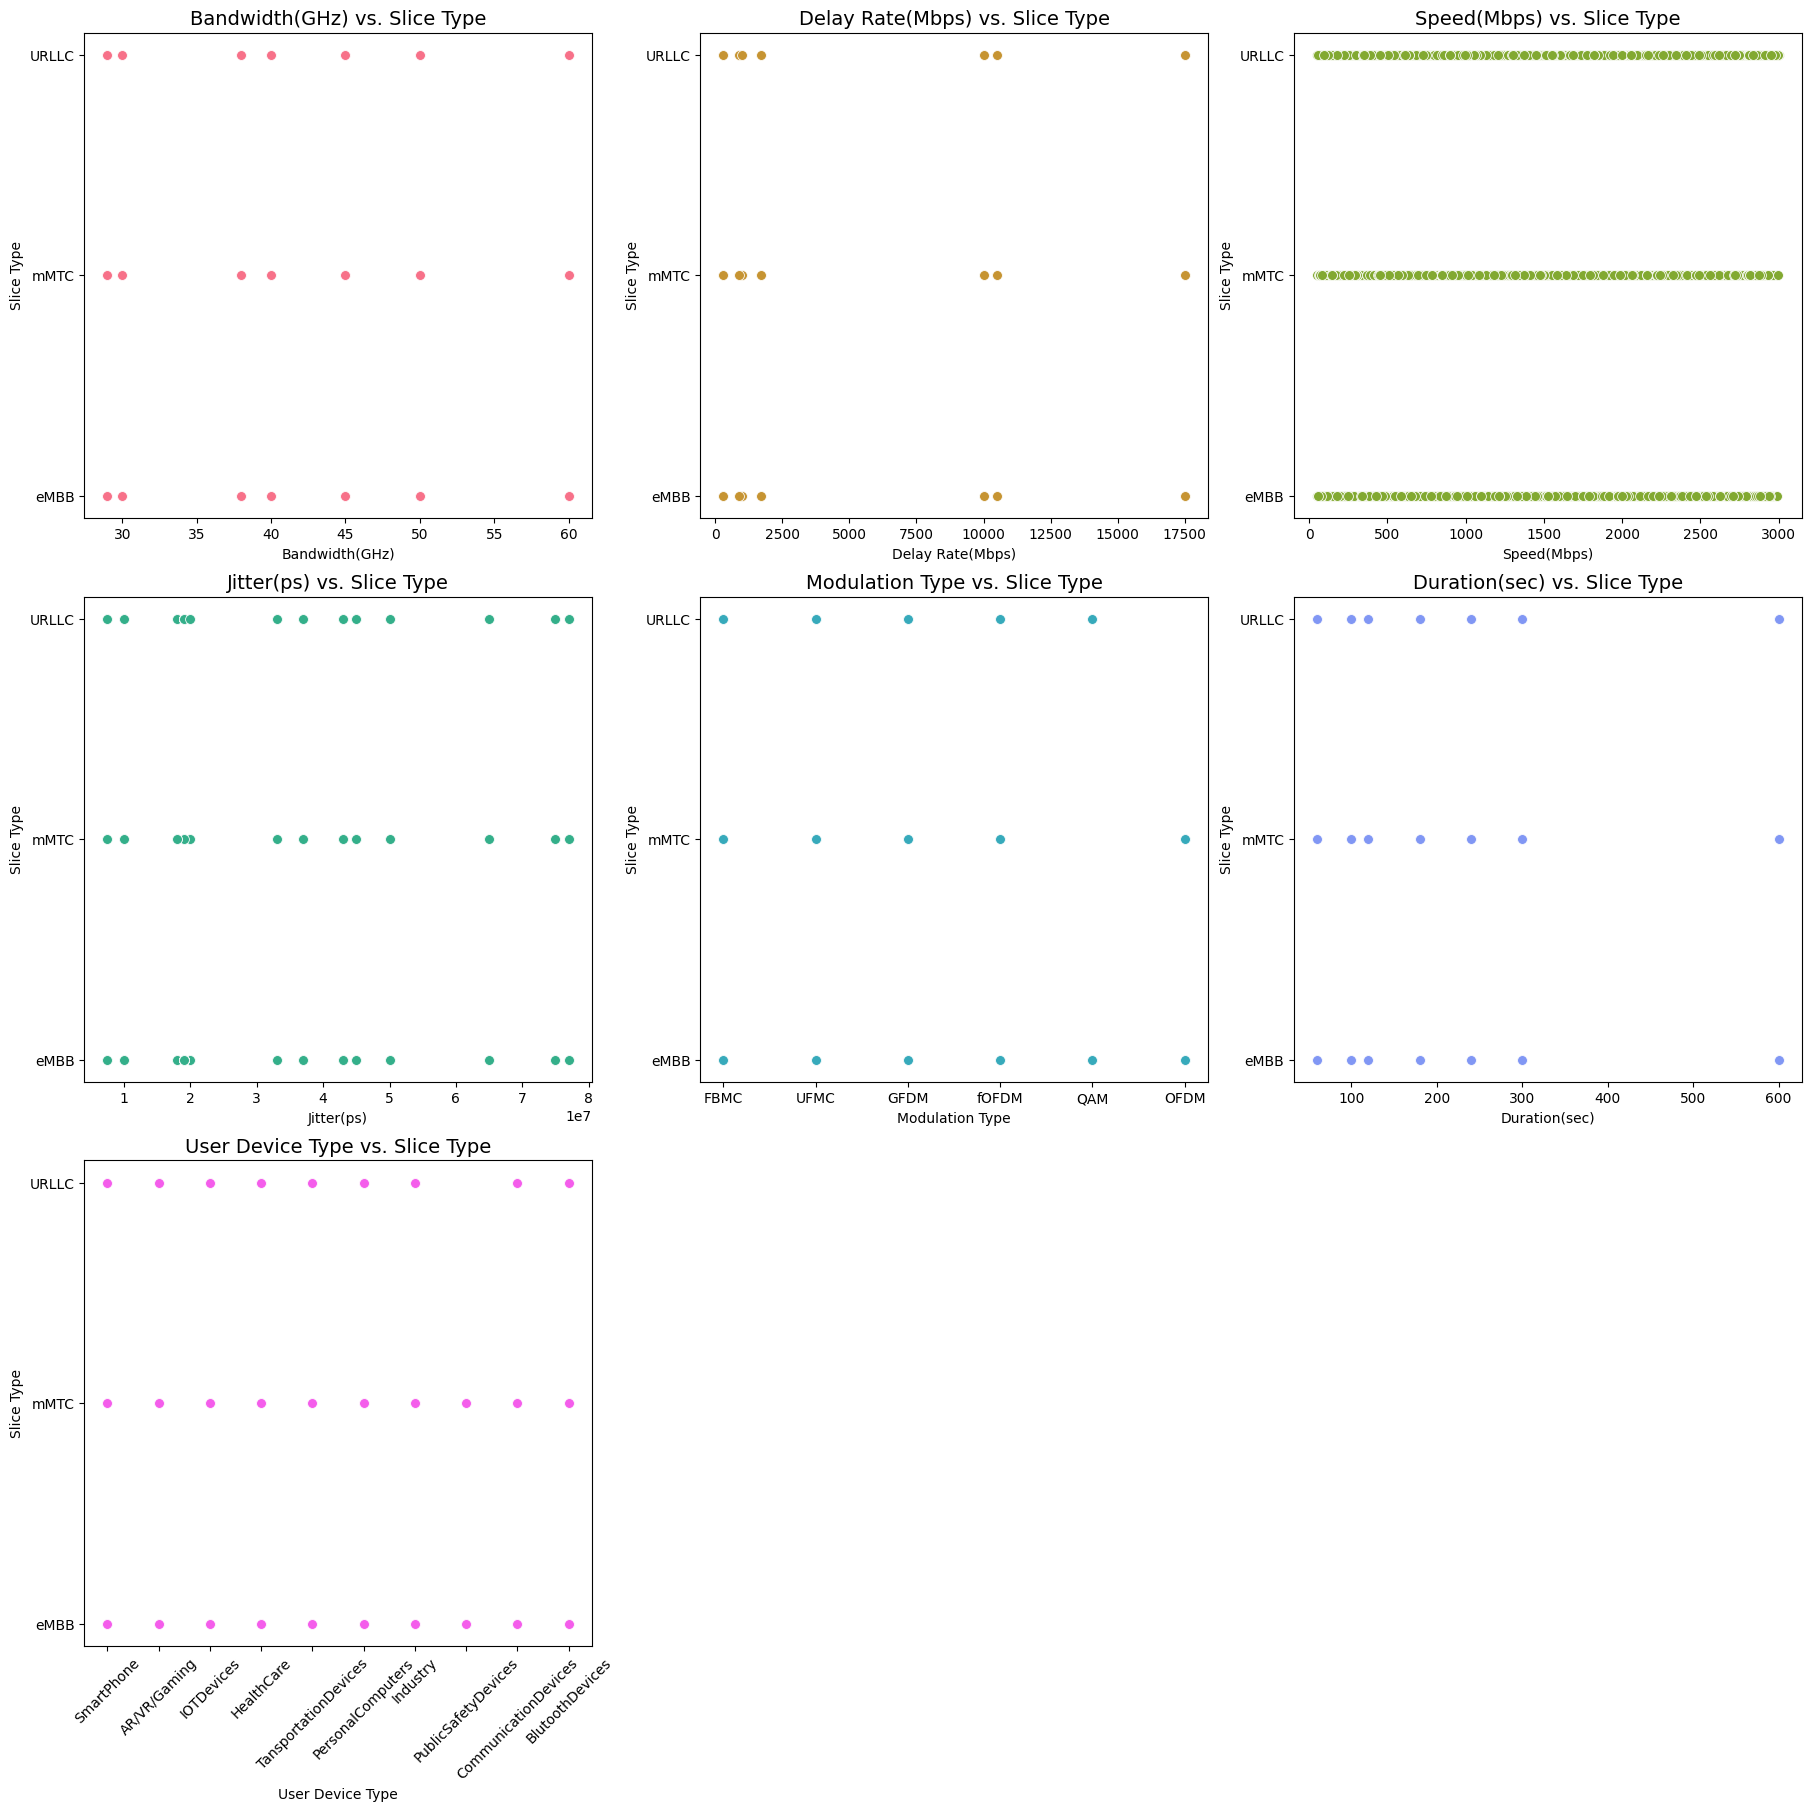

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for scatter plots
columns_to_plot = [
    'Bandwidth(GHz)',
    'Delay Rate(Mbps)',
    'Speed(Mbps)',
    'Jitter(ps)',
    'Modulation Type',
    'Duration(sec)',
    'User Device Type'
]

# Set the number of columns for the subplot grid
num_columns = 3
num_rows = -(-len(columns_to_plot) // num_columns)  # Calculate rows needed (ceil division)

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows), constrained_layout=True)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("husl", len(columns_to_plot))  # Use 'husl' for distinct colors

# Plot each scatter plot on a separate subplot
for idx, column in enumerate(columns_to_plot):
    sns.scatterplot(
        data=df_final,
        x=column,
        y='Slice Type',
        s=50,
        color=colors[idx],  # Assign a unique color to each plot
        legend=False,
        ax=axes[idx]
    )
    axes[idx].set_title(f"{column} vs. Slice Type", fontsize=14)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("Slice Type")

    # Rotate x-axis labels only for User Device Type
    if column == 'User Device Type':
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused subplots
for idx in range(len(columns_to_plot), len(axes)):
    axes[idx].axis('off')

# Show the plot
plt.show()

## Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder

df_final.rename(
    columns={"User Device Type": "UserDeviceType", "Paket Loss Rate(Reliability)": "PacketLossRate", "Packet Delay Budget( Latency(ms))": "Latency","Bandwidth(GHz)":"Bandwidth","Delay Rate(Mbps)":"DelayRate","Speed(Mbps)":"Speed","Jitter(ps)":"Jitter","Modulation Type":"ModulationType","Slice Type":"SliceType"},
    inplace=True,
)

categoric = ['UserDeviceType', 'ModulationType', 'SliceType']
for cat in categoric:
    print("Value count for: ", cat)
    print(df_final[cat].unique(), df_final[cat].nunique())

lb = LabelEncoder()
for cat in categoric:
    df_final[cat] = lb.fit_transform(df_final[cat])
df_final

Value count for:  UserDeviceType
['SmartPhone' 'AR/VR/Gaming' 'IOTDevices' 'HealthCare'
 'TansportationDevices' 'PersonalComputers' 'Industry'
 'PublicSafetyDevices' 'CommunicationDevices' 'BlutoothDevices'] 10
Value count for:  ModulationType
['FBMC' 'UFMC' 'GFDM' 'fOFDM' 'QAM' 'OFDM'] 6
Value count for:  SliceType
['URLLC' 'mMTC' 'eMBB'] 3


,UserDeviceType,Duration(sec),PacketLossRate,Latency,Bandwidth,DelayRate,Speed,Jitter,ModulationType,SliceType
17,8,300,0.010000,28,50,10000,1319,43000000.0,0,0
18,8,60,0.000010,22,60,1700,1686,77000000.0,0,0
19,8,100,0.010000,45,45,900,2226,20000000.0,0,0
20,8,600,0.000100,50,40,10500,1358,18000000.0,0,0
21,8,600,0.000100,35,38,1000,1002,19000000.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000.0,1,2
2996,1,100,0.000010,28,29,300,512,10000000.0,1,2
2997,1,180,0.000001,25,29,300,1752,65000000.0,1,2
2998,1,300,0.001000,20,45,300,453,45000000.0,1,2


## Model training with different algorithms

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

X = df_final.iloc[:,0:9]
y = df_final.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


### Random Forest

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.7411167512690355
{'bootstrap': True, 'max_depth': 8, 'max_features': None, 'min_samples_split': 12, 'n_estimators': 300}
RandomForestClassifier(max_depth=8, max_features=None, min_samples_split=12,
                       n_estimators=300)


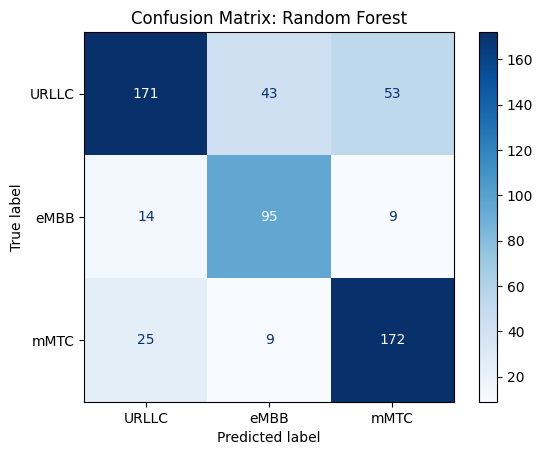

In [12]:
# random forest classifier
param_grid = {
    'bootstrap': [False,True],
    'max_depth': [5,8,10, 20],
    'max_features': [3, 4, 5, None],
    'min_samples_split': [2, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc = RandomForestClassifier()

grid_random_forest = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)

grid_random_forest.fit(X_train,y_train)
y_pred_rfc = grid_random_forest.predict(X_test)
random_forest = grid_random_forest.best_estimator_
accuracy_random_forest = accuracy_score(y_test, y_pred_rfc)
print("Accuracy: ", accuracy_random_forest)
print(grid_random_forest.best_params_)
print(grid_random_forest.best_estimator_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Random Forest")
plt.show()


### AdaBoost Classifier

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy:  0.7580372250423012
{'learning_rate': 0.01, 'n_estimators': 200}
AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.01, n_estimators=200, random_state=42)


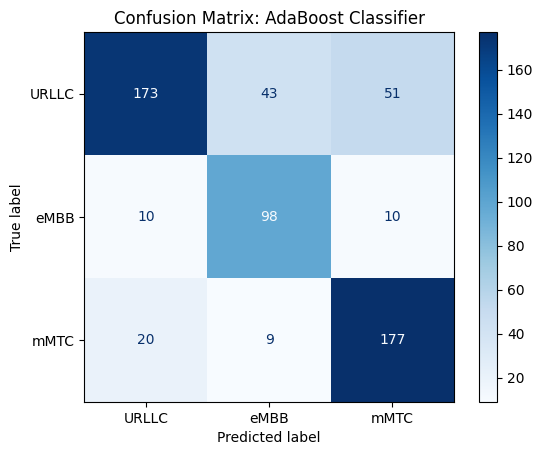

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# AdaBoost Classifier
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Replace 'base_estimator' with 'estimator'
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), random_state=42, algorithm="SAMME")
grid_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=5, n_jobs=-1, verbose=1)
grid_adaboost.fit(X_train, y_train)
best_adaboost_estimator = grid_adaboost.best_estimator_
y_pred_ad = grid_adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_ad)
print("Accuracy: ", accuracy_adaboost)
print(grid_adaboost.best_params_)
print(grid_adaboost.best_estimator_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_ad)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: AdaBoost Classifier")
plt.show()


### Gradient Boosting Classifier

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy:  0.7478849407783418
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=42)


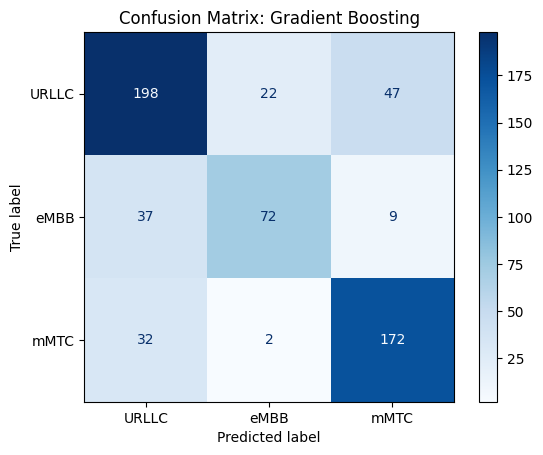

In [14]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
# Gradient Boosting Classifier
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gradient_boosting = GradientBoostingClassifier(random_state=42)
grid_gradient_boosting = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gradient_boosting, cv=5, n_jobs=-1, verbose=1)
grid_gradient_boosting.fit(X_train, y_train)
best_gradient_boosting_estimator = grid_gradient_boosting.best_estimator_
y_pred_gb = grid_gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gb)
print("Accuracy: ", accuracy_gradient_boosting)
print(grid_gradient_boosting.best_params_)
print(grid_gradient_boosting.best_estimator_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Gradient Boosting")
plt.show()


### Extra Trees Classifier

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Accuracy:  0.727580372250423
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
ExtraTreesClassifier(max_depth=10, n_estimators=50, random_state=42)


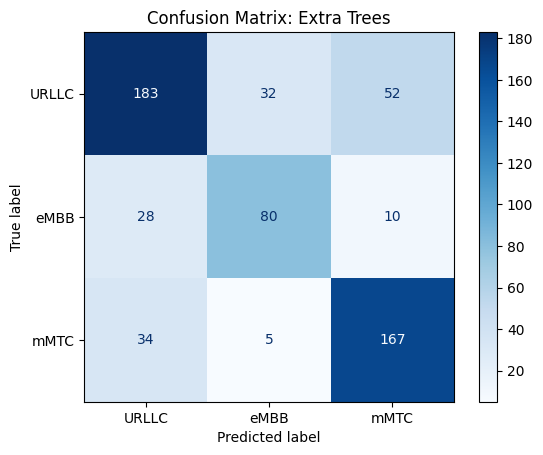

In [15]:

# Extra Trees Classifier
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': [ 'sqrt', 'log2']
}

extra_trees = ExtraTreesClassifier(random_state=42)
grid_extra_trees = GridSearchCV(estimator=extra_trees, param_grid=param_grid_extra_trees, cv=5, n_jobs=-1, verbose=1)
grid_extra_trees.fit(X_train, y_train)
best_extra_trees_estimator = grid_extra_trees.best_estimator_
y_pred_et = grid_extra_trees.predict(X_test)
accuracy_extra_trees = accuracy_score(y_test, y_pred_et)
print("Accuracy: ", accuracy_extra_trees)
print(grid_extra_trees.best_params_)
print(grid_extra_trees.best_estimator_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_et)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Extra Trees")
plt.show()


### Bagging Classifier

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy:  0.7089678510998308
{'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 200}
BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=0.5, n_estimators=200, random_state=42)


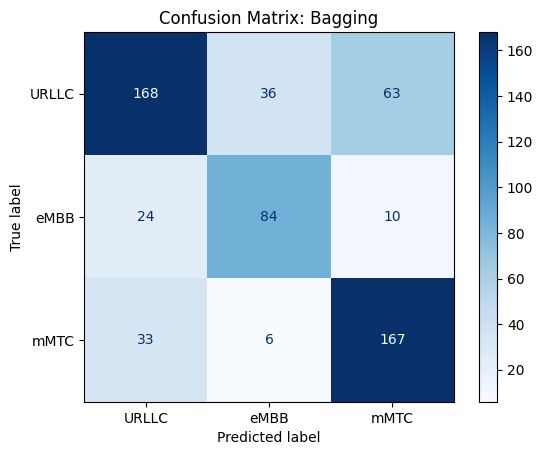

In [16]:
# Bagging Classifier
param_grid_bagging = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)
grid_bagging = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid_bagging, cv=5, n_jobs=-1, verbose=1)
grid_bagging.fit(X_train, y_train)
best_bagging_estimator = grid_bagging.best_estimator_
y_pred_bg = grid_bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bg)
print("Accuracy: ", accuracy_bagging)
print(grid_bagging.best_params_)
print(grid_bagging.best_estimator_)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_bg)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Bagging")
plt.show()



### Decision Tree Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy:  0.6683587140439933
{'max_depth': 10, 'max_features': 'sqrt'}
DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)


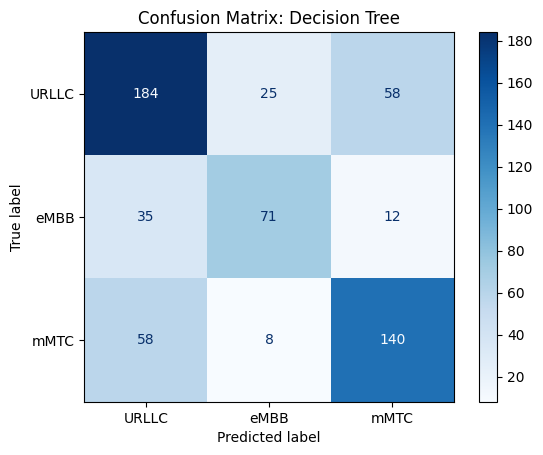

In [17]:
# Decision Tree Classifier
param_grid_decision_tree = {
    'max_depth': [None, 5, 10],
    'max_features': [ 'sqrt', 'log2']
}

decision_tree = DecisionTreeClassifier(random_state=42)
grid_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, cv=5, n_jobs=-1, verbose=1)
grid_decision_tree.fit(X_train, y_train)
best_decision_tree_estimator = grid_decision_tree.best_estimator_
y_pred_dt = grid_decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", accuracy_decision_tree)
print(grid_decision_tree.best_params_)
print(grid_decision_tree.best_estimator_)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Decision Tree")
plt.show()


### Multi-layer Perceptron Classifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy:  0.4517766497461929
{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0005, 'max_iter': 300, 'solver': 'adam'}
MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate_init=0.0005, max_iter=300, random_state=42)


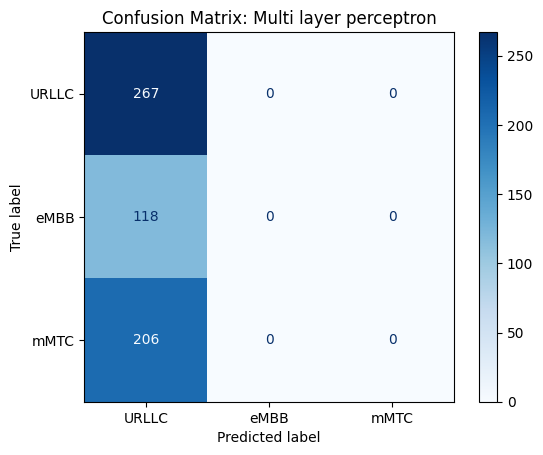

In [18]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.0005],  # Lower learning rates
    'max_iter': [300]  # Allow more iterations
}

mlp_classifier = MLPClassifier(random_state=42)
grid_mlp = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid_mlp, cv=5, n_jobs=-1, verbose=1)
grid_mlp.fit(X_train, y_train)
best_mlp_estimator = grid_mlp.best_estimator_
y_pred_mlp = grid_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", accuracy_mlp)
print(grid_mlp.best_params_)
print(grid_mlp.best_estimator_)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, y_pred_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Multi layer perceptron")
plt.show()



### Stacking Classifier

In [19]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# Stacking Classifier
stacking_models = [
    ('rfc', random_forest),
    ('adaboost', adaboost),
    ('gradient_boosting', gradient_boosting),
    ('extra_trees', extra_trees),
    ('bagging', bagging_classifier),
    ('decision_tree', decision_tree),
    ('mlp', mlp_classifier)
]

stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=LogisticRegression(), cv=5)
stacking_classifier.fit(X_train_scale, y_train)


StackingClassifier(cv=5,
                   estimators=[('rfc',
                                RandomForestClassifier(max_depth=8,
                                                       max_features=None,
                                                       min_samples_split=12,
                                                       n_estimators=300)),
                               ('adaboost',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   estimator=DecisionTreeClassifier(max_depth=5),
                                                   random_state=42)),
                               ('gradient_boosting',
                                GradientBoostingClassifier(random_state=42)),
                               ('extra_trees',
                                ExtraTreesClassifier(random_state=42)),
                               ('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                  random_state=42)),
                               ('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('mlp', MLPClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

Stacking Classifier Accuracy: 0.751269035532995


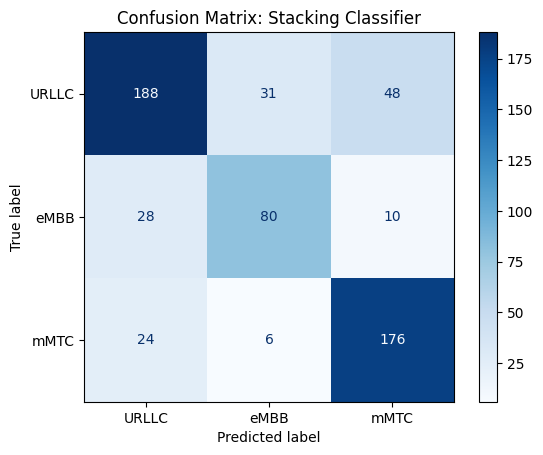

In [20]:
# Evaluate the stacking classifier
stacking_predictions = stacking_classifier.predict(X_test_scale)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Classifier Accuracy:", stacking_accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, stacking_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Stacking Classifier")
plt.show()


###  Voting Classifier

Hard Voting Classifier Accuracy: 0.7326565143824028


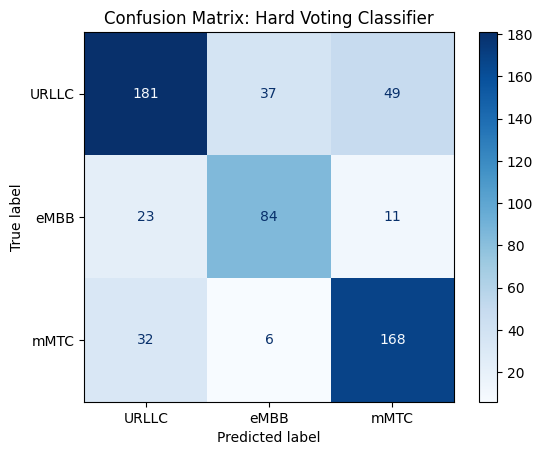

Soft Voting Classifier Accuracy: 0.7225042301184433


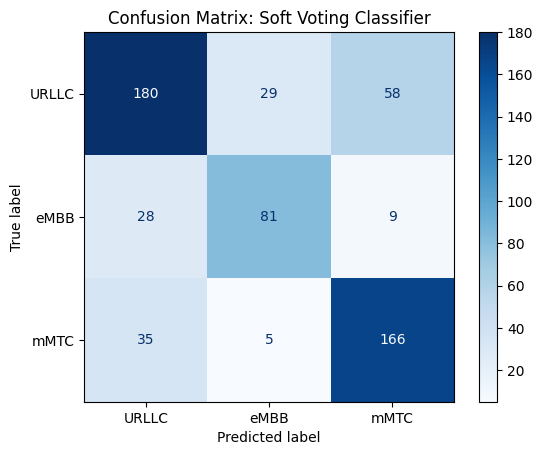

In [21]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
voting_models = [
    ('rf', random_forest),
    ('adaboost', adaboost),
    ('gradient_boosting', gradient_boosting),
    ('extra_trees', extra_trees),
    ('bagging', bagging_classifier),
    ('decision_tree', decision_tree),
    ('mlp', mlp_classifier)
]

# Hard Voting Classifier
voting_hard = VotingClassifier(estimators=voting_models, voting='hard')
voting_hard.fit(X_train_scale, y_train)
voting_hard_predictions = voting_hard.predict(X_test_scale)
voting_hard_accuracy = accuracy_score(y_test, voting_hard_predictions)
print("Hard Voting Classifier Accuracy:", voting_hard_accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, voting_hard_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Hard Voting Classifier")
plt.show()

# Soft Voting Classifier
voting_soft = VotingClassifier(estimators=voting_models, voting='soft')
voting_soft.fit(X_train_scale, y_train)
voting_soft_predictions = voting_soft.predict(X_test_scale)
voting_soft_accuracy = accuracy_score(y_test, voting_soft_predictions)
print("Soft Voting Classifier Accuracy:", voting_soft_accuracy)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix_rf = confusion_matrix(y_test, voting_soft_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=lb.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Soft Voting Classifier")
plt.show()



## Model Accuracies and Loss metrics

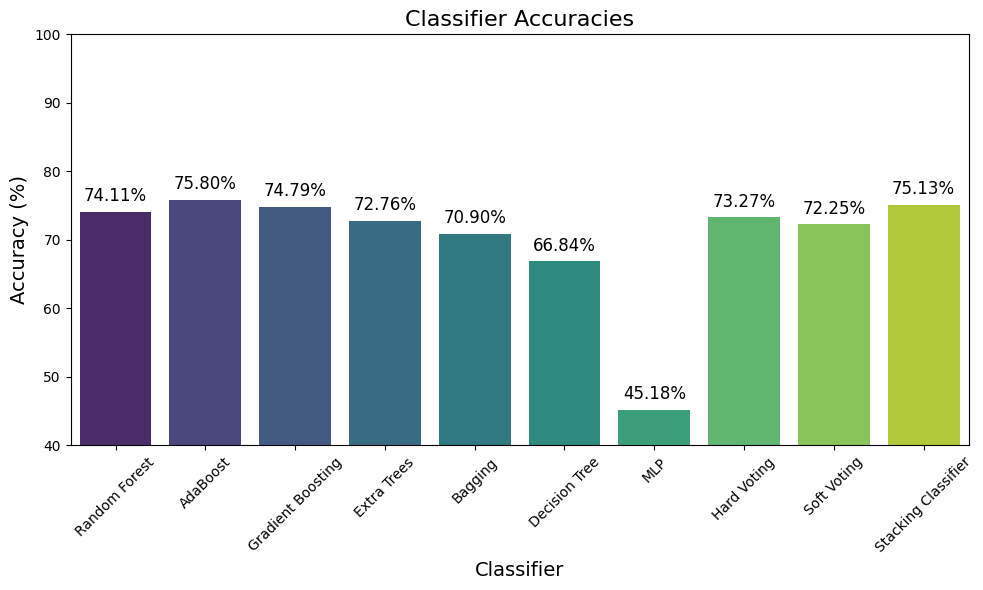

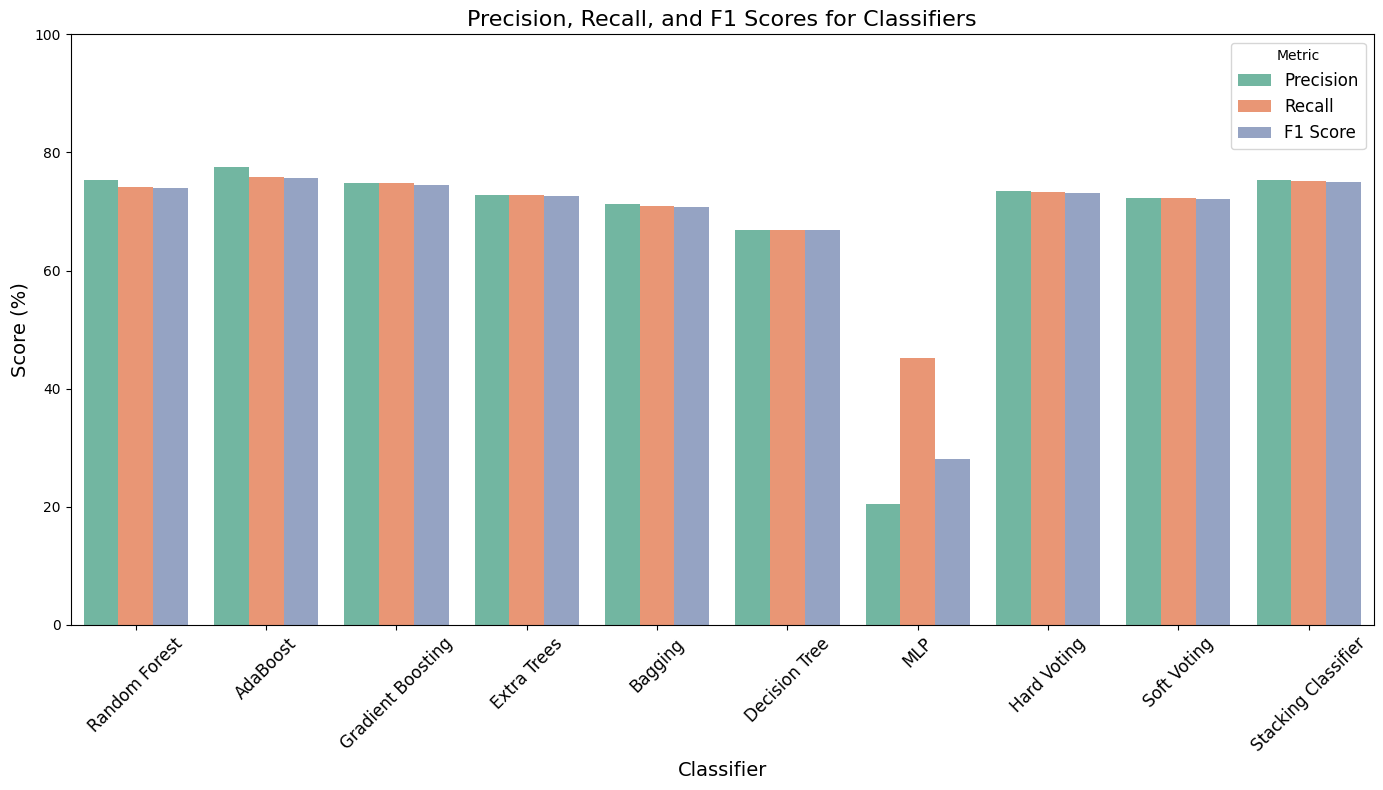

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Data for visualization
model_names = [
    "Random Forest", "AdaBoost", "Gradient Boosting", 
    "Extra Trees", "Bagging", "Decision Tree", "MLP", "Hard Voting", "Soft Voting", "Stacking Classifier"
]
accuracies = [
    accuracy_random_forest, accuracy_adaboost, accuracy_gradient_boosting,
    accuracy_extra_trees, accuracy_bagging, accuracy_decision_tree, accuracy_mlp, voting_hard_accuracy, voting_soft_accuracy, stacking_accuracy
]

# Convert accuracies to percentages
accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

# Bar Plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=model_names, y=accuracies_percentage, palette="viridis")
plt.title("Classifier Accuracies", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Classifier", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(40, 100)  # Percentage range

# Annotate percentages above bars
for bar, accuracy in zip(bar_plot.patches, accuracies_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar.get_height() + 1,  # Y-coordinate: Slightly above the bar
        f"{accuracy:.2f}%",  # Format as percentage with 2 decimal places
        ha="center", va="bottom", fontsize=12
    )

plt.tight_layout()
plt.show()


# Define models
models = [
    random_forest, best_adaboost_estimator, best_gradient_boosting_estimator,
    best_extra_trees_estimator, best_bagging_estimator, best_decision_tree_estimator,
    best_mlp_estimator, voting_hard, voting_soft, stacking_classifier
]

# Initialize metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Compute metrics for each model
for i, model in enumerate(models):
    if model_names[i] in ["Hard Voting", "Soft Voting", "Stacking Classifier"]:
        y_pred = model.predict(X_test_scale)  # Use scaled test data
    else:
        y_pred = model.predict(X_test)  # Use unscaled test data

    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))  # Precision
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))  # Recall
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))  # F1 Score

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Precision": [score * 100 for score in precision_scores],  # Convert to percentage
    "Recall": [score * 100 for score in recall_scores],  # Convert to percentage
    "F1 Score": [score * 100 for score in f1_scores],  # Convert to percentage
})

# Plot the metrics
plt.figure(figsize=(14, 8))
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="Set2")

# Customize the plot
plt.title("Precision, Recall, and F1 Scores for Classifiers", fontsize=16)
plt.ylabel("Score (%)", fontsize=14)
plt.xlabel("Classifier", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 100)
plt.legend(title="Metric", fontsize=12)
plt.tight_layout()
plt.show()



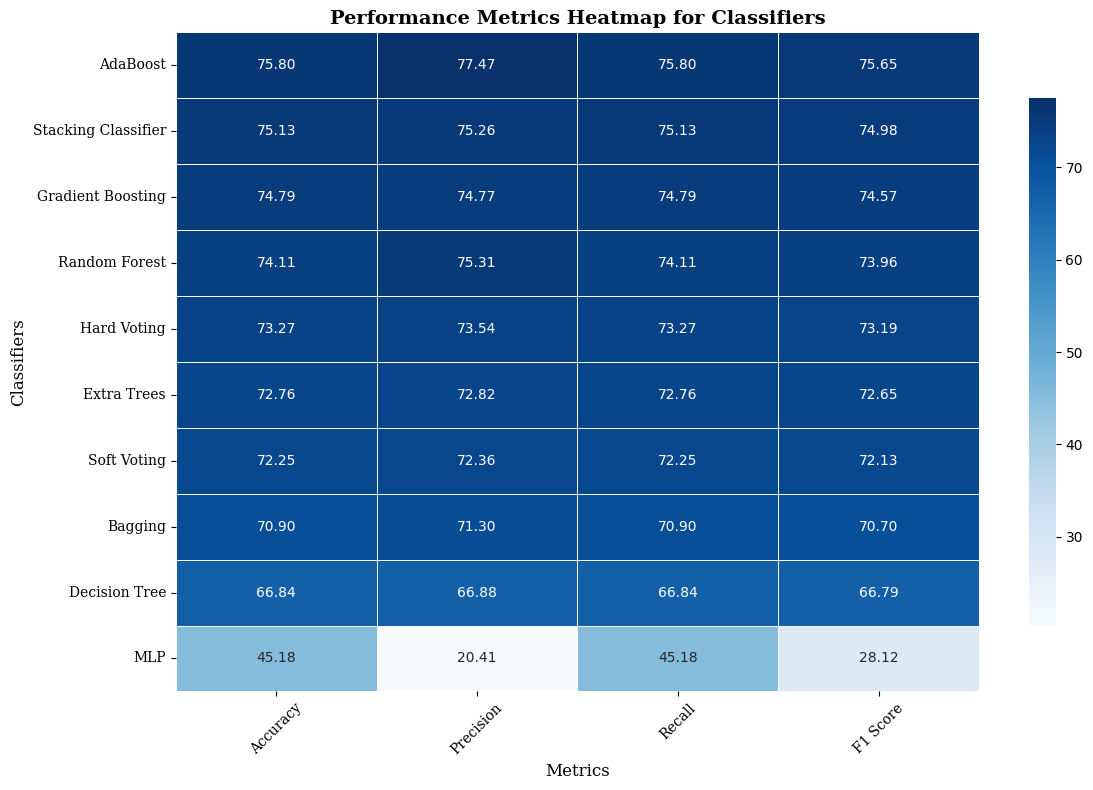

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


models = [
    random_forest, best_adaboost_estimator, best_gradient_boosting_estimator,
    best_extra_trees_estimator, best_bagging_estimator, best_decision_tree_estimator,
    best_mlp_estimator, voting_hard, voting_soft, stacking_classifier
]

# Define model names
model_names = [
    "Random Forest", "AdaBoost", "Gradient Boosting",
    "Extra Trees", "Bagging", "Decision Tree", "MLP",
    "Hard Voting", "Soft Voting", "Stacking Classifier"
]

# Initialize metrics
precision_scores = []
recall_scores = []
f1_scores = []
accuracies = [
    accuracy_random_forest, accuracy_adaboost, accuracy_gradient_boosting,
    accuracy_extra_trees, accuracy_bagging, accuracy_decision_tree, accuracy_mlp, voting_hard_accuracy, voting_soft_accuracy, stacking_accuracy
]

# Compute metrics for each model
for i, model in enumerate(models):
    if model_names[i] in ["Hard Voting", "Soft Voting", "Stacking Classifier"]:
        y_pred = model.predict(X_test_scale)  # Use scaled test data
    else:
        y_pred = model.predict(X_test)  # Use unscaled test data

    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))  # Precision
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))  # Recall
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))  # F1 Score

# Create a DataFrame for heatmap
metrics_data = pd.DataFrame({
    "Accuracy": [acc * 100 for acc in accuracies],  # Convert to percentage
    "Precision": [prec * 100 for prec in precision_scores],
    "Recall": [rec * 100 for rec in recall_scores],
    "F1 Score": [f1 * 100 for f1 in f1_scores]
}, index=model_names)

# Sort models based on F1 Score (or any metric you choose)
metrics_data_sorted = metrics_data.sort_values(by="F1 Score", ascending=False)

# Plot heatmap with a subtle and professional color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(
    metrics_data_sorted, 
    annot=True, 
    fmt=".2f", 
    cmap="Blues",
    linewidths=0.5, 
    cbar=True, 
    cbar_kws={"shrink": 0.8, "aspect": 20}  # Adjust the colorbar style
)

# Adjust plot aesthetics for IEEE style
plt.title("Performance Metrics Heatmap for Classifiers", fontsize=14, fontweight="bold", family="serif")
plt.xlabel("Metrics", fontsize=12, family="serif")
plt.ylabel("Classifiers", fontsize=12, family="serif")
plt.xticks(rotation=45, fontsize=10, family="serif")
plt.yticks(fontsize=10, family="serif")
plt.gca().xaxis.label.set_size(12)
plt.gca().yaxis.label.set_size(12)

# Final layout adjustments
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)  # Save in high resolution
plt.show()

